In [ ]:
# checking if the initial phase distribution is random
# for my data generation process

# looking at initial phase of 22 and inital amplitude of 22

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

import numpy as np

import lal
import lalsimulation as lalsim

# from scrinet.interfaces import lalutils, rotations 
from wispy import lalutils, rotations 


from tensorflow.keras.utils import get_custom_objects
import pugna.activations
import pugna.layers
import pugna.models
import pugna.callbacks
import wispy.mscalev5
import wispy.model_utils
import wispy.callbacks
import wispy.utils
import wispy.logger
import wispy.resnet
import wispy
import subprocess
import datetime
import argparse
import sys
import os
import numpy as np
import tqdm
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
def gen_t_phi(m1, m2, s1x, s1y, s1z, s2x, s2y, s2z):
    params = lalutils.gen_td_modes_wf_params(
        m1=m1,
        m2=m2,
        approximant=lalsim.SEOBNRv4P,
        S1x=s1x,
        S1y=s1y,
        S1z=s1z,
        S2x=s2x,
        S2y=s2y,
        S2z=s2z,
        f_min=12,
        f_ref=12,
        phiRef=1.2)

    t_min = -1000
    # t_min = -5000
    times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]], t_min=t_min, t_max=110)

    amp_22 = np.abs(hlms[(2,2)])
    phi_22 = np.unwrap(np.angle(hlms[(2,2)]))
    
    return times, phi_22, amp_22

In [3]:
%%time
size = 300
m1=50
m2=50
s1xs = np.random.uniform(0,1,size)
s1zs = s1xs-1

s2xs = np.random.uniform(0,1,size)
s2zs = s2xs-1

times=[]
phis=[]
amps=[]
for i in range(size):
    t,p,a = gen_t_phi(m1, m2, s1xs[i], 0, s1zs[i], s2xs[i], 0, s2zs[i])
    times.append(t)
    phis.append(p)
    amps.append(a)

CPU times: user 3min 40s, sys: 3.28 s, total: 3min 44s
Wall time: 3min 45s


In [5]:
phi_0 = [p[0] for p in phis]

In [4]:
amp_0 = [a[0] for a in amps]

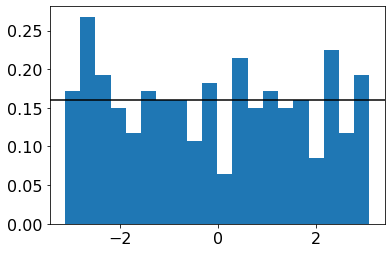

In [6]:
a=np.min(np.array(phi_0))
b=np.max(np.array(phi_0))

plt.figure()
plt.hist(np.array(phi_0), bins=20, density=True);
plt.axhline(1/(b - a), c='k')

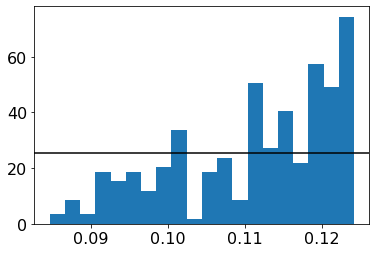

In [7]:
a=np.min(np.array(amp_0))
b=np.max(np.array(amp_0))

plt.figure()
plt.hist(np.array(amp_0), bins=20, density=True);
plt.axhline(1/(b - a), c='k')